In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## EDA

### 1. Univariate analysis *(10 Marks)*

In [3]:
df = pd.read_csv("concrete.csv")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
(df==0).sum() ## check number of zeros in the column

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


`No null values`

`Our target variable is strength i.e a continuous varibale. Hence we will use regressor version of all algorithms`


In [6]:
#Check for duplicte rows
df.duplicated().sum()

25

In [7]:
# Remving duplicates
df = df.drop_duplicates()

In [8]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


`Slag, Ash and Superplastcizer can be zero. As Cement, water, coarseagg and fineagg are the important constituents of cement.`

`Age should not be zero.`

`Concrete starts developing strength after 24 hours, its gain approx 15% of its strength after 1 day and around 99% strength after 28 days. Therefore min age has to be 1.`

In [9]:
df.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

`Age is highly skewed`

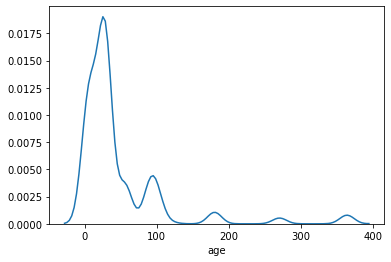

In [10]:
# To see skewness of age
sns.distplot(df['age'],hist=False)
plt.show()

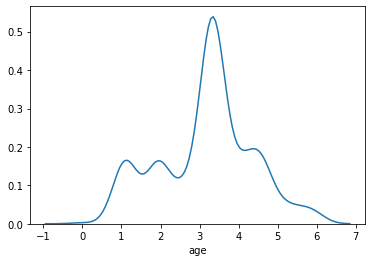

In [11]:
# Skewness of Age after log transformation
sns.distplot(np.log(df['age']),hist=False)
plt.show()

# log transformation to reduce skewness

In [12]:
df['age'] = np.log(df['age'])

### 2. Bi-variate analysis *(10 marks)*

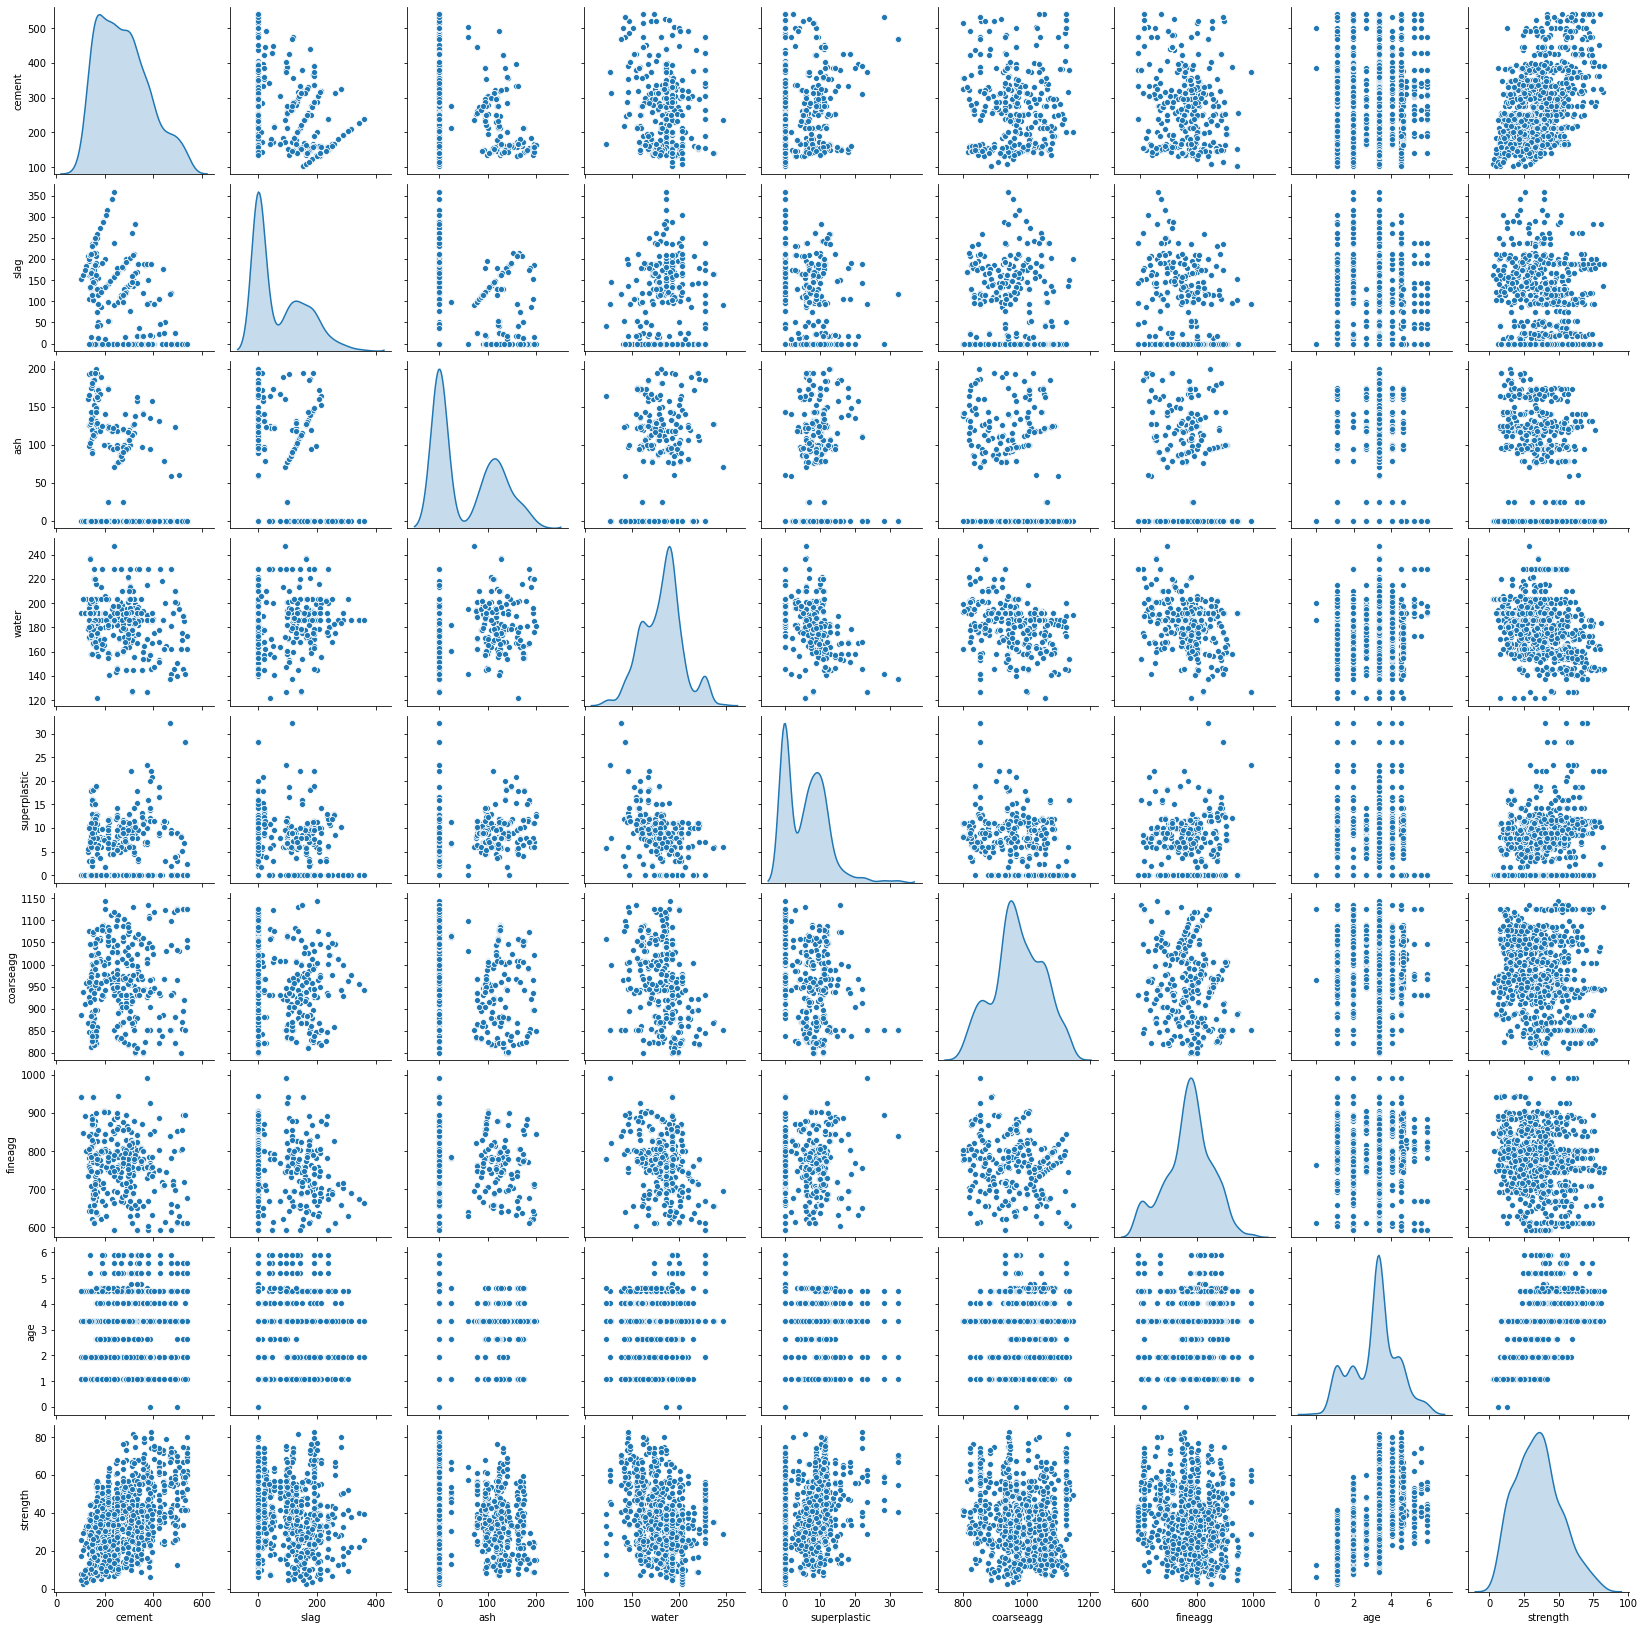

In [13]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(df , diag_kind = 'kde')
plt.show()

`As age is increasing strength is increasing`

`Cement and strength have a linear relationship`

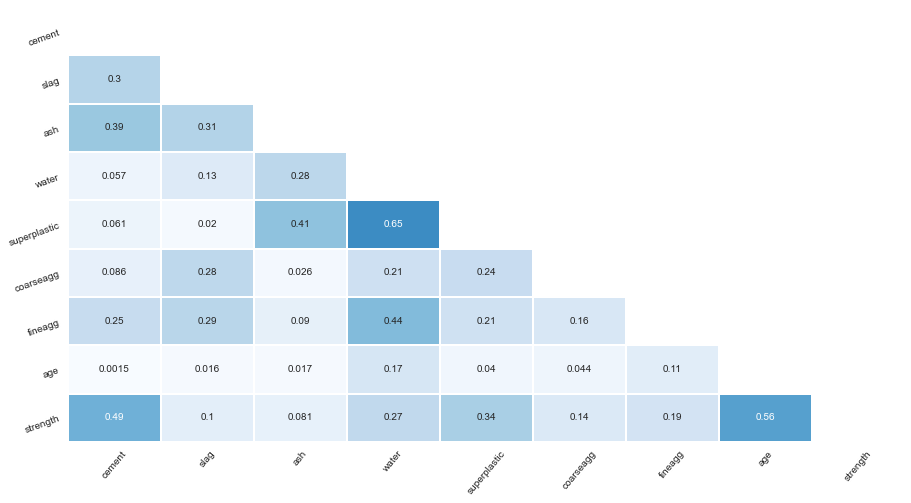

In [14]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

`"age", "cement" have the highest correlation with the target`

### 3. Feature Engineering techniques (10 marks)

In [15]:
df['water:cement'] = df['water']/df['cement']  # Extracting a new column

In [16]:
df['coarseagg:fineagg'] = df['coarseagg'] / df['fineagg'] # Extracting a new column

In [17]:
df = df[['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'water:cement', 'coarseagg:fineagg', 'strength']] # rearranging columns

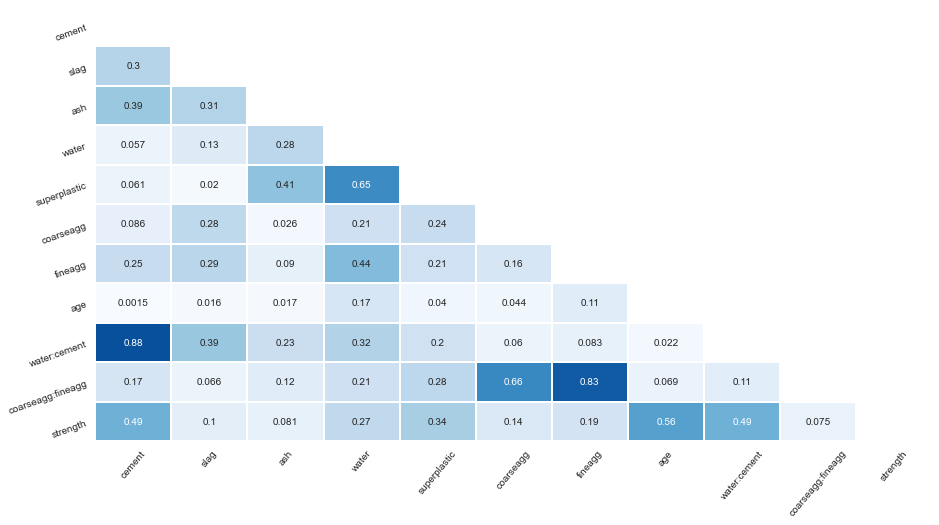

In [18]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

`So we can have w:c a feature in place of water and cement because it shows high correlation with strength`

`coarseagg:fineagg doesnt look good so we will drop it`

In [19]:
df = df.drop(['cement','water','coarseagg:fineagg'],axis=1)

# As we already taken the info related to 'water' and 'cement' in 'water:cement' feature, therefore dropping 'water' and 'cement'
# 'coarseagg:fineagg' was not a feature because both columns individually provide more info

In [20]:
# Separating dependent and independent variables
x = df.drop('strength',axis=1)
y = df['strength']

In [21]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

In [22]:
#Degree 1
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=7)

model.fit(xtrain,ytrain)

print(model.score(xtrain,ytrain))

print(model.score(xtest,ytest))

0.9961253299308925
0.8338303458979717


In [23]:
y_pred = model.predict(xtest)
df_pred = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred.flatten()})
df_pred.head(10)

,Actual,Predicted
113,31.35,39.58
809,7.72,10.35
756,15.61,15.82
435,48.40,59.76
242,26.20,21.97
421,13.29,13.29
489,64.30,65.20
270,55.16,47.22
485,27.87,20.59
670,23.14,21.91


In [24]:
y_pred

array([39.58 , 10.35 , 15.82 , 59.76 , 21.97 , 13.29 , 65.2  , 47.22 ,
       20.59 , 21.91 , 53.58 , 39.   , 50.66 , 31.84 , 18.03 , 40.15 ,
       55.64 , 48.28 , 19.93 , 16.88 , 31.45 , 17.37 , 59.76 , 27.83 ,
       24.58 , 32.63 , 42.35 , 45.3  , 44.61 , 28.63 , 27.83 , 23.22 ,
       60.95 , 29.22 , 36.94 , 32.53 ,  9.85 , 52.12 , 27.83 , 56.81 ,
       30.28 , 43.7  , 20.97 , 50.73 , 10.34 , 19.35 , 35.96 , 39.   ,
       41.05 , 59.49 , 41.93 , 13.57 , 51.73 , 59.3  , 39.64 , 25.75 ,
        6.94 , 46.8  , 37.42 , 18.03 , 42.23 , 28.94 , 16.5  , 37.23 ,
       26.91 , 33.72 , 43.39 , 42.13 , 56.4  , 44.52 , 52.5  , 21.78 ,
       68.75 , 15.52 , 38.56 , 39.4  , 12.55 , 14.59 , 22.44 , 45.655,
       43.06 , 18.   , 23.4  , 29.87 , 13.71 , 38.7  , 23.4  , 39.42 ,
       39.42 , 57.22 , 27.83 , 32.4  , 26.77 , 14.7  , 51.26 , 60.32 ,
       33.54 , 44.39 , 19.42 ,  4.83 , 47.03 , 36.94 , 15.03 , 25.48 ,
       24.89 , 69.66 , 32.4  , 50.73 , 51.02 , 21.5  , 30.28 , 35.86 ,
      

In [25]:
ytest

113    31.35
809     7.72
756    15.61
435    48.40
242    26.20
       ...  
261    17.24
913    66.10
641    14.31
320    64.02
585    56.06
Name: strength, Length: 302, dtype: float64

In [26]:
df1 = pd.DataFrame(ytest,y_pred)

In [27]:
df1

,strength
39.58,NaN
10.35,NaN
15.82,NaN
59.76,NaN
21.97,NaN
...,...
16.26,NaN
68.10,NaN
10.03,NaN
43.94,NaN


In [28]:
#Degree 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(xtrain,ytrain)

print(pipeline.score(xtrain,ytrain))

print(pipeline.score(xtest,ytest))

0.9961253299308925
0.8305483505195441


In [29]:
#Degree 3

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=3)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(xtrain,ytrain)

print(pipeline.score(xtrain,ytrain))

print(pipeline.score(xtest,ytest))

0.9961253299308925
0.8081413786999805


`As it is visible that highest testing score is in degree one so going fprward with degree 1`

## Models

### 1. Different Models *(15 marks)*

In [30]:
from sklearn.model_selection import cross_val_score,KFold
k =  KFold(random_state=7,n_splits=5)

# KFold will split the data in 5 equal parts

In [31]:
algo= []
cv_r2_mean = []
cv_r2_std = []
cv_rmse_mean = []

# Blanks list to store model name, cross validated r2 score (mean and standard deviation) and RMSE

In [32]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', LinearRegression())
])


algo.append('Linear Regression')
cv_r2_mean.append(cross_val_score(pipeline, xtrain, ytrain, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline, xtrain, ytrain, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline, xtrain, ytrain, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

When we use mean squared error as scoring in cross val score it gives output with a negative sign. So we use Negative sign to make it positive.

In [33]:
# Decision Tree

model = DecisionTreeRegressor(random_state=7)


algo.append('Decision Tree')
cv_r2_mean.append(cross_val_score(model, xtrain, ytrain, cv=k).mean())
cv_r2_std.append(cross_val_score(model, xtrain, ytrain, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, xtrain, ytrain, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [34]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)


algo.append('Random Forest')
cv_r2_mean.append(cross_val_score(model, xtrain, ytrain, cv=k).mean())
cv_r2_std.append(cross_val_score(model, xtrain, ytrain, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, xtrain, ytrain, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [35]:
# Bagging
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(random_state=7)


algo.append('Bagging')
cv_r2_mean.append(cross_val_score(model, xtrain, ytrain, cv=k).mean())
cv_r2_std.append(cross_val_score(model, xtrain, ytrain, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, xtrain, ytrain, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [36]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=7)


algo.append('AdaBoost')
cv_r2_mean.append(cross_val_score(model, xtrain, ytrain, cv=k).mean())
cv_r2_std.append(cross_val_score(model, xtrain, ytrain, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, xtrain, ytrain, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [37]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=7)


algo.append('Gradient Boosting')
cv_r2_mean.append(cross_val_score(model, xtrain, ytrain, cv=k).mean())
cv_r2_std.append(cross_val_score(model, xtrain, ytrain, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, xtrain, ytrain, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [38]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['CV R2 score mean'] = cv_r2_mean
results['CV R2 score std'] = cv_r2_std
results['CV RMSE'] = cv_rmse_mean
results = results.set_index('Model')
results

,CV R2 score mean,CV R2 score std,CV RMSE
Model,,,
Linear Regression,0.738595,0.014844,8.343648
Decision Tree,0.794953,0.016311,7.391328
Random Forest,0.880728,0.019090,5.658161
Bagging,0.871936,0.020383,5.869827
AdaBoost,0.763287,0.023629,7.933814
Gradient Boosting,0.885485,0.013357,5.550754


`Gradient Boosting is the best algorithm here`

`Bagging and Random Forest are almost same, second best algorithms`

### 2. Hyper Parameter Tuning *(15 marks)*

**Grid Search on Random Forest**

In [39]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=7)

params = {
    'bootstrap': [True,False],
    'max_depth': [3,4,None],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,3, 4],
    'min_samples_split': [2,3,5],
    'n_estimators': [25,50,'warn']
}    

grid = GridSearchCV(estimator = rf, param_grid = params, cv = k)

grid.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
             estimator=RandomForestRegressor(random_state=7),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 4, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [25, 50, 'warn']})

In [40]:
from sklearn.metrics import mean_squared_error
model = ['Random forest after Grid search']
tr = [grid.score(xtrain,ytrain)]
te = [grid.score(xtest,ytest)]
rmse = [mean_squared_error(ytest,grid.predict(xtest))**0.5]

**Random Search on Gradient Boosting**

In [41]:
gb = GradientBoostingRegressor(random_state=7)
gb.fit(xtrain,ytrain)

GradientBoostingRegressor(random_state=7)

In [42]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 25 numbers
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.1, 1, num = 10)]

# Create the random grid
params_r = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'learning_rate':learning_rate}

# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator=gb, param_distributions=params_r,cv = k, random_state=7)

# Fit the random search model
random.fit(xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   estimator=GradientBoostingRegressor(random_state=7),
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5, 0.6,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0],
                                        'max_depth': [5, 6, 7, 8, 10, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [50, 54, 58, 62, 66, 70,
                         

In [43]:
random.best_params_

{'n_estimators': 120,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'learning_rate': 0.1}

In [44]:
model.append('Gradient Boosting after RandomCV')
tr.append(random.score(xtrain,ytrain))
te.append(random.score(xtest,ytest))
rmse.append(mean_squared_error(ytest,random.predict(xtest))**0.5)

In [45]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = tr
results['Testing Score'] = te
results['RMSE'] = rmse
results = results.set_index('Model')
results

,Training Score,Testing Score,RMSE
Model,,,
Random forest after Grid search,0.996125,0.921927,4.500233
Gradient Boosting after RandomCV,0.994950,0.937390,4.030001


`Gradient Boosting gives better results after hyperparameter tuning as well`

`Hence our final model was able to explain 93.7 % variance was explained by the model from all the independent variables with RMSE score of 4 Mpa in concrete strength`

`Our final model is slightly overfit but the testing score is high enough so we can use this model for now or we can try to reduce noise by changing parameters`